<a href="https://colab.research.google.com/github/Bhanuprakashvelthuri/ShadowFox/blob/main/Store_Sales_and_Profit_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd

file_path = "/content/Sample - Superstore.csv"
df = pd.read_csv(file_path, encoding='latin-1')

In [9]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [10]:
#data cleaning
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [13]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [14]:
df = df.drop_duplicates()

In [15]:
print("\nDataset Summary:\n", df.describe())


Dataset Summary:
             Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [16]:
print("\nColumn Names:\n", df.columns)


Column Names:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [17]:
df.rename(columns={'Sales': 'Total_Sales', 'Profit': 'Total_Profit'}, inplace=True)

In [18]:
#data visualization
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
sales_trend = df.groupby('Year')['Total_Sales'].sum()

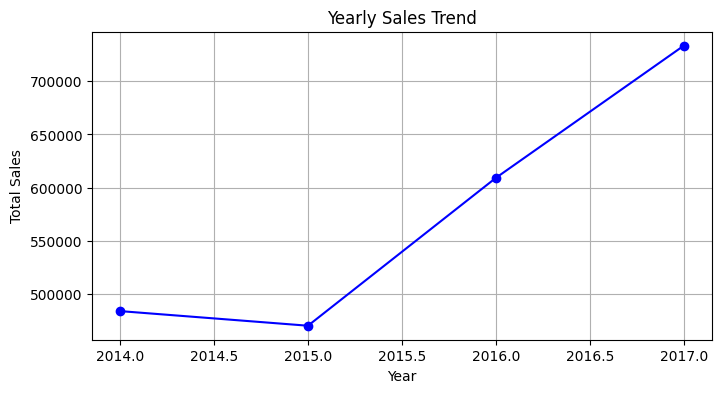

In [19]:
plt.figure(figsize=(8, 4))
sales_trend.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

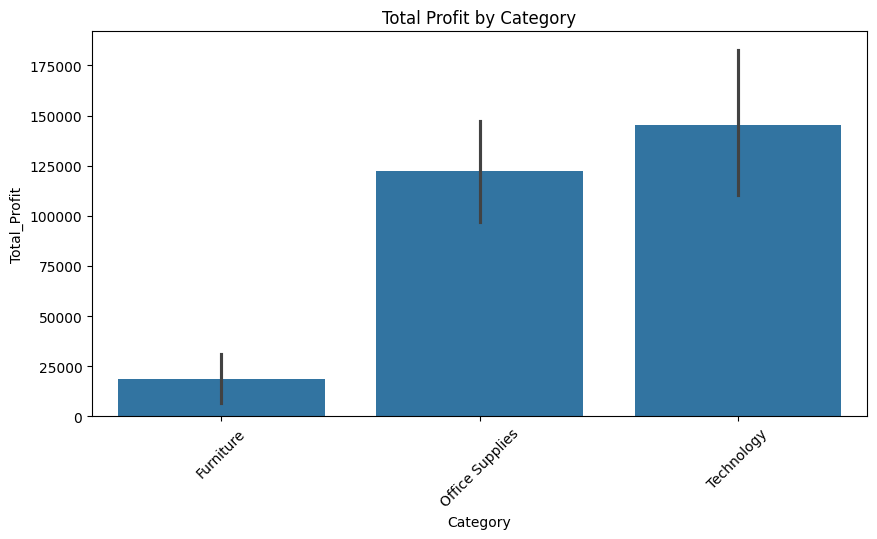

In [20]:
#profit by categery
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Total_Profit', data=df, estimator=np.sum)
plt.title("Total Profit by Category")
plt.xticks(rotation=45)
plt.show()

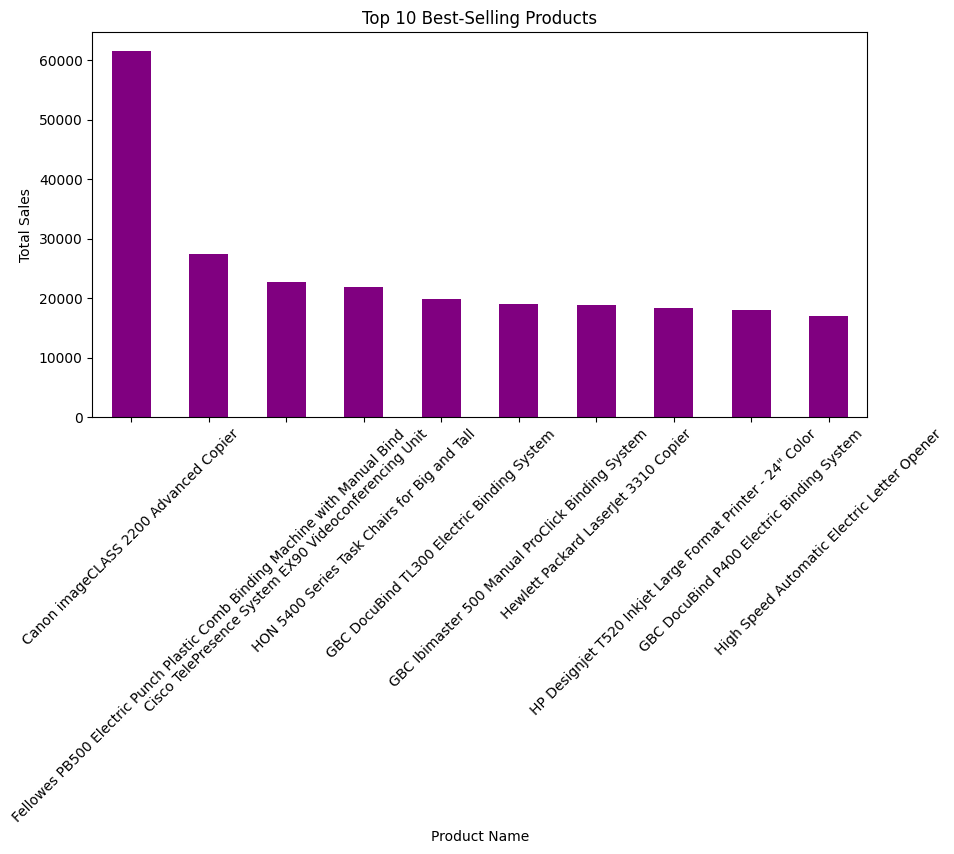

In [21]:
#top 10 saleing products
top_products = df.groupby("Product Name")["Total_Sales"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="purple")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

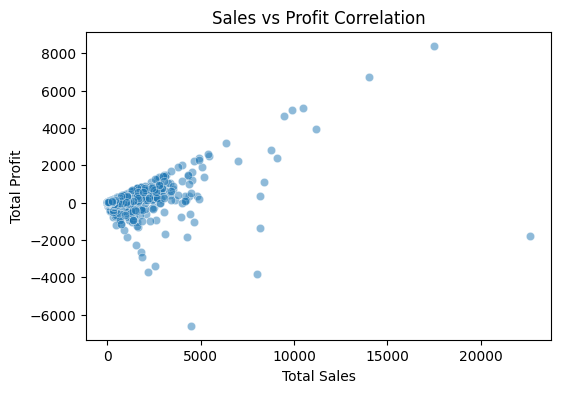

In [22]:
#corrilation btw sales and profit
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Total_Sales', y='Total_Profit', data=df, alpha=0.5)
plt.title("Sales vs Profit Correlation")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.show()

In [23]:
#key insights
print("\n🔹 Key Insights:")
print("1. Sales have increased over the years, showing business growth.")
print("2. Some product categories are more profitable than others.")
print("3. The best-selling products do not always have the highest profit margins.")
print("4. There is a strong positive correlation between Sales and Profit.")


🔹 Key Insights:
1. Sales have increased over the years, showing business growth.
2. Some product categories are more profitable than others.
3. The best-selling products do not always have the highest profit margins.
4. There is a strong positive correlation between Sales and Profit.
